# Improrting Important Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

# Reading and understanding the Data

In [3]:
df = pd.read_csv(r"C:\Users\Karan\Downloads\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200


As per the data dictionary, below mentioned three columns are given as percentage of GDPP

Converting them to actual values for further analysis

In [4]:
# Changing percentage coulmns to actual values
df['exports']=df['gdpp']*df['exports']*100
df['health']=(df['gdpp']*df['health'])*100
df['imports']=(df['gdpp']*df['imports'])*100

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,553000.00,419174.00,2482970.00,1610,9.44,56.20,5.82,553
1,Albania,16.60,11452000.00,2678950.00,19877400.00,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,17126400.00,1859820.00,14004400.00,12900,16.10,76.50,2.89,4460
3,Angola,119.00,21991900.00,1006050.00,15143700.00,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,55510000.00,7356600.00,71858000.00,19100,1.44,76.80,2.13,12200


### Checking the sturcture of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,74206188.47,10567332.04,65883521.08,17144.69,7.78,70.56,2.95,12964.16
std,40.33,179738857.95,18014089.06,147108104.18,19278.07,10.57,8.89,1.51,18328.70
min,2.60,10769.20,128212.00,6510.92,609.00,-4.21,32.10,1.15,231.00
25%,8.25,4471400.00,785355.00,6402150.00,3355.00,1.81,65.30,1.79,1330.00
50%,19.30,17774400.00,3218860.00,20455800.00,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,72780000.00,9769400.00,77196000.00,22800.00,10.75,76.80,3.88,14050.00
max,208.00,1837500000.00,86636000.00,1491000000.00,125000.00,104.00,82.80,7.49,105000.00


In [8]:
print("shape of dataset is" ,df.shape)

shape of dataset is (167, 10)


In [9]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

### Checking for null values is the data

In [11]:
print('Null values: \n{}'.format(df.isnull().sum()))
print('\nNaN values: \n{}'.format(df.isna().sum()))

Null values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

NaN values: 
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


There are no Null or NaN values in the dataset

# Data Visualisation

## Visualising numerical variables through pairplot 

<Figure size 1800x1080 with 0 Axes>

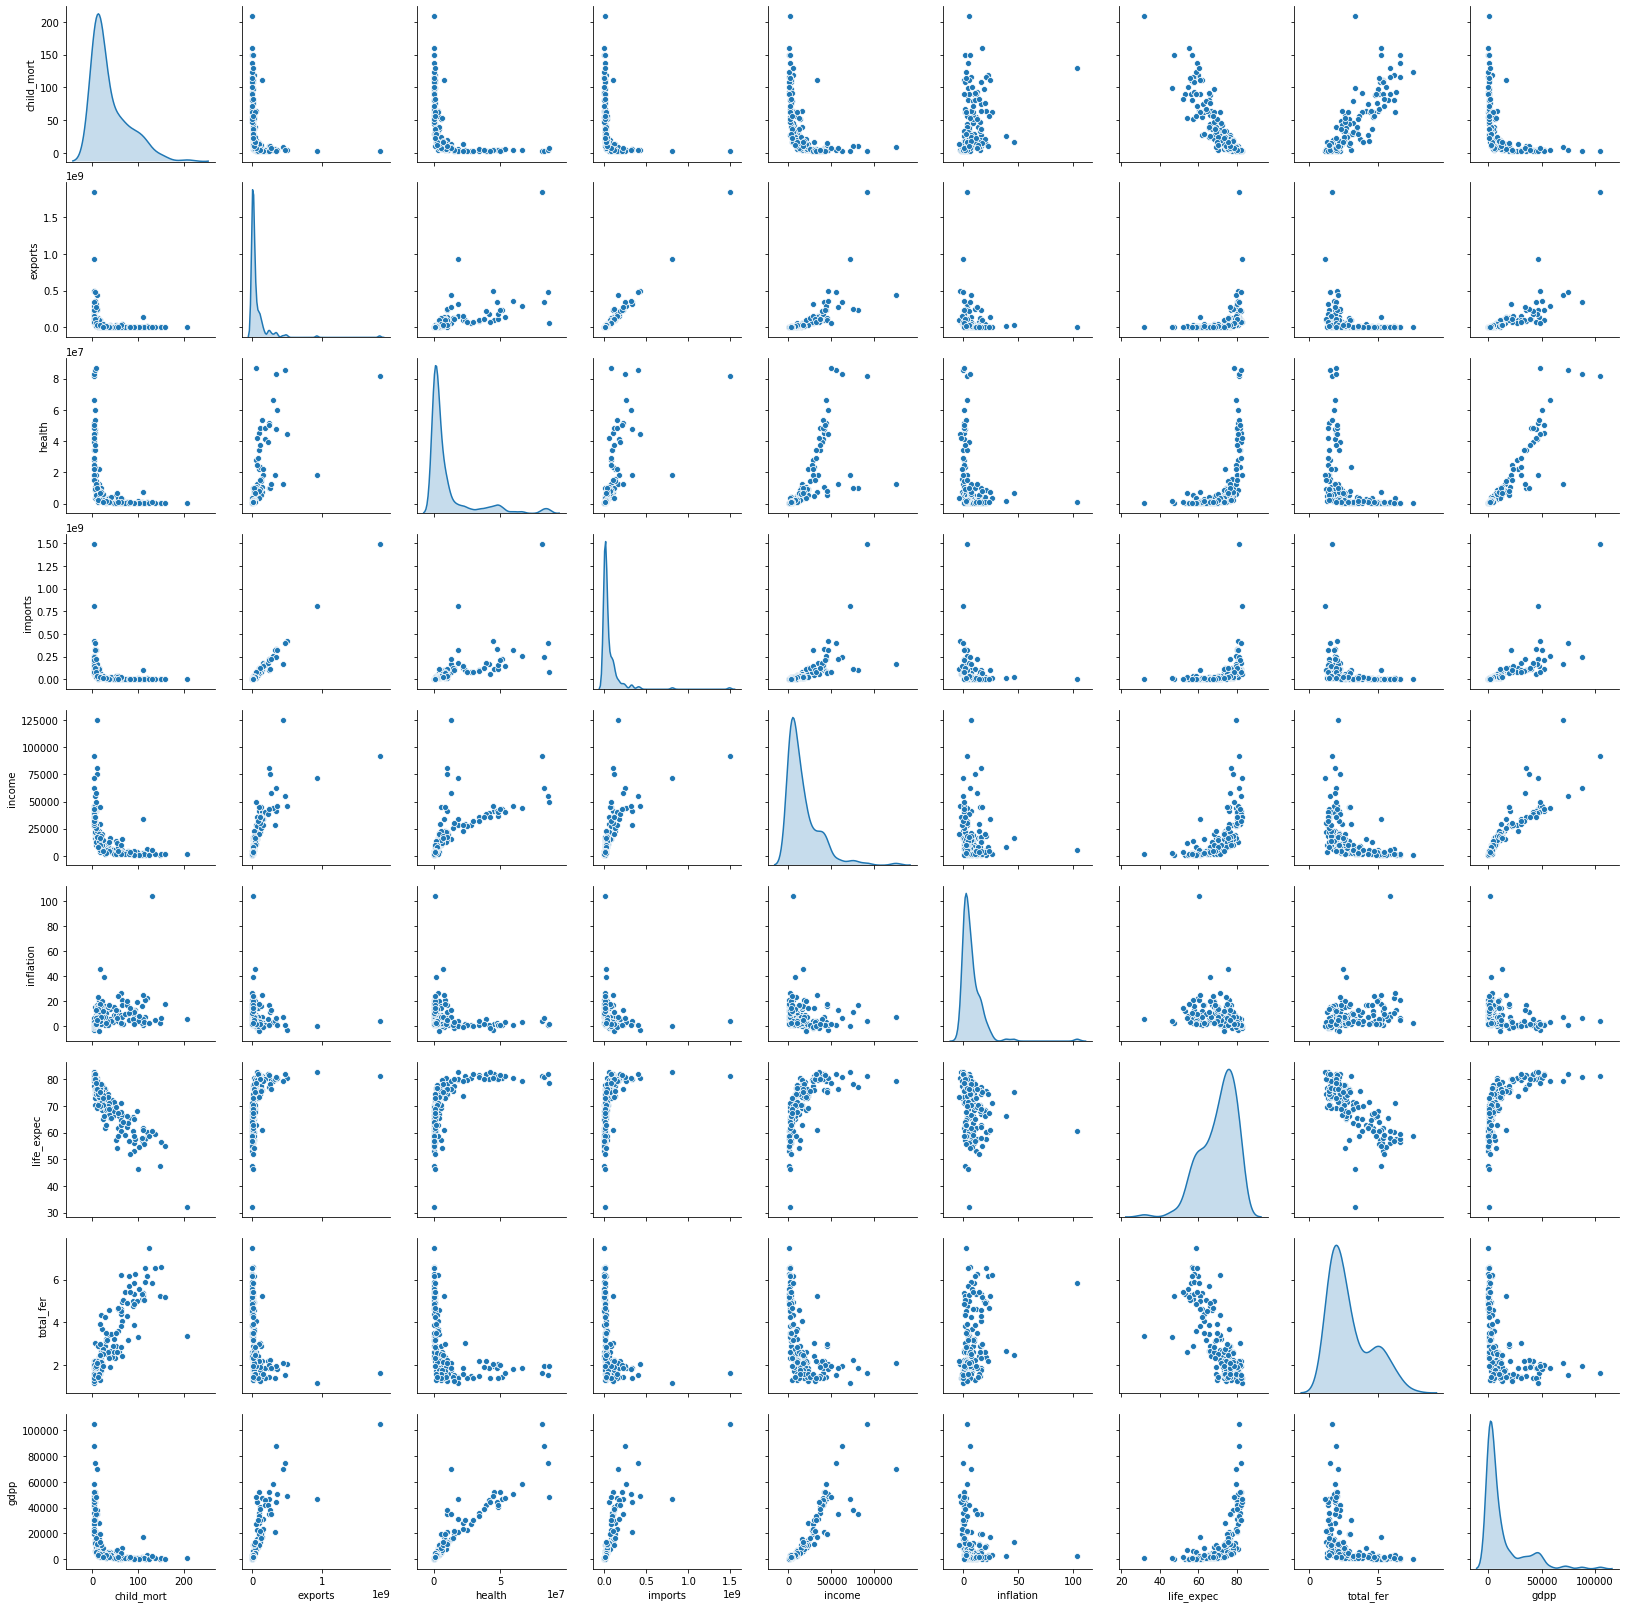

In [12]:
plt.figure(figsize = (25,15))
sns.pairplot(df, diag_kind='kde')
plt.show()

### Inferences

 - Linear relation is found between gdpp-income,imports-exports,total_fer-child_mort
 - Rectangular hyperbola curve is generated by gdpp-child_mort.
 - If gdpp is HIGH:
   - child mortality is LOW
   - income is HIGH
   - inflation is LOW
   - life expectancy is HIGH
   - total fertility is LOW
   - health, imports and exports are MEDIUM

## Visualising the correlation between the variables via heatmap

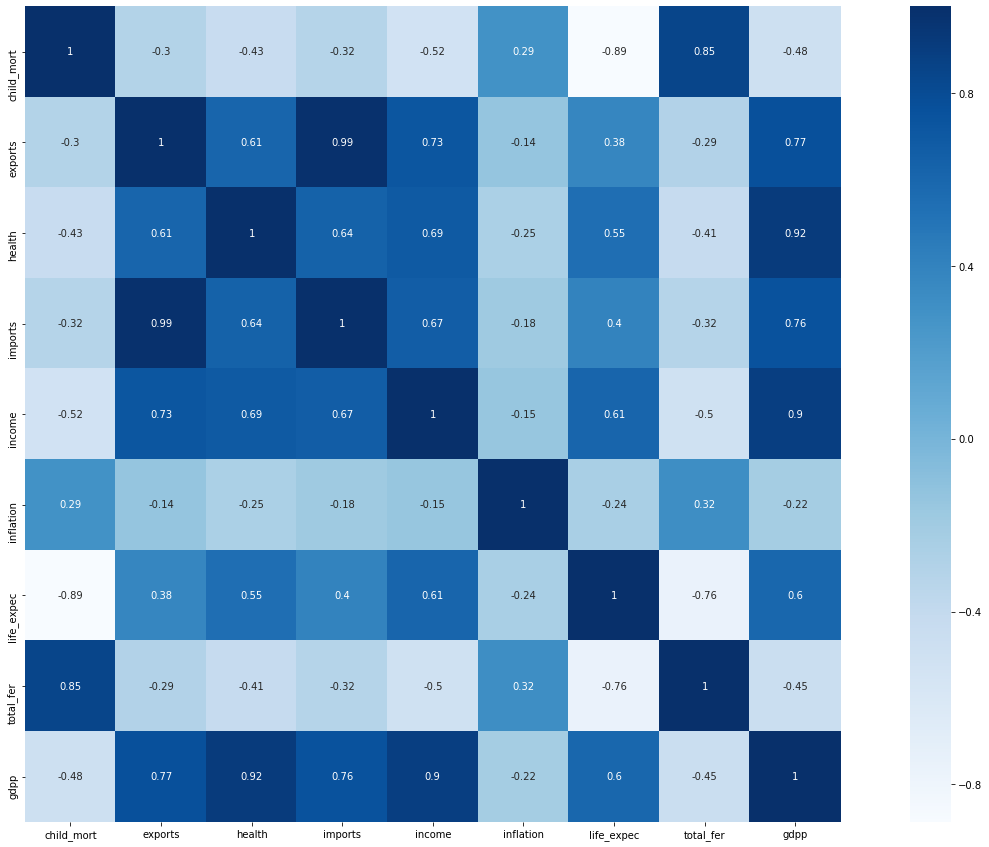

In [13]:
plt.figure(figsize = (25,15))
ax = sns.heatmap(df.corr(),square = True,annot=True, cmap="Blues")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Inferences
 - exports is highly correlated with imports.
 - health, exports, income,imports are highly correlated with gdpp.
 - child_mort is having high negative correlation with life_expec.
 - total_fer is highly positively correlated with child_mort and negatively correlated with life_expec


## Visualising the top 5 countries for each variable via Barplot

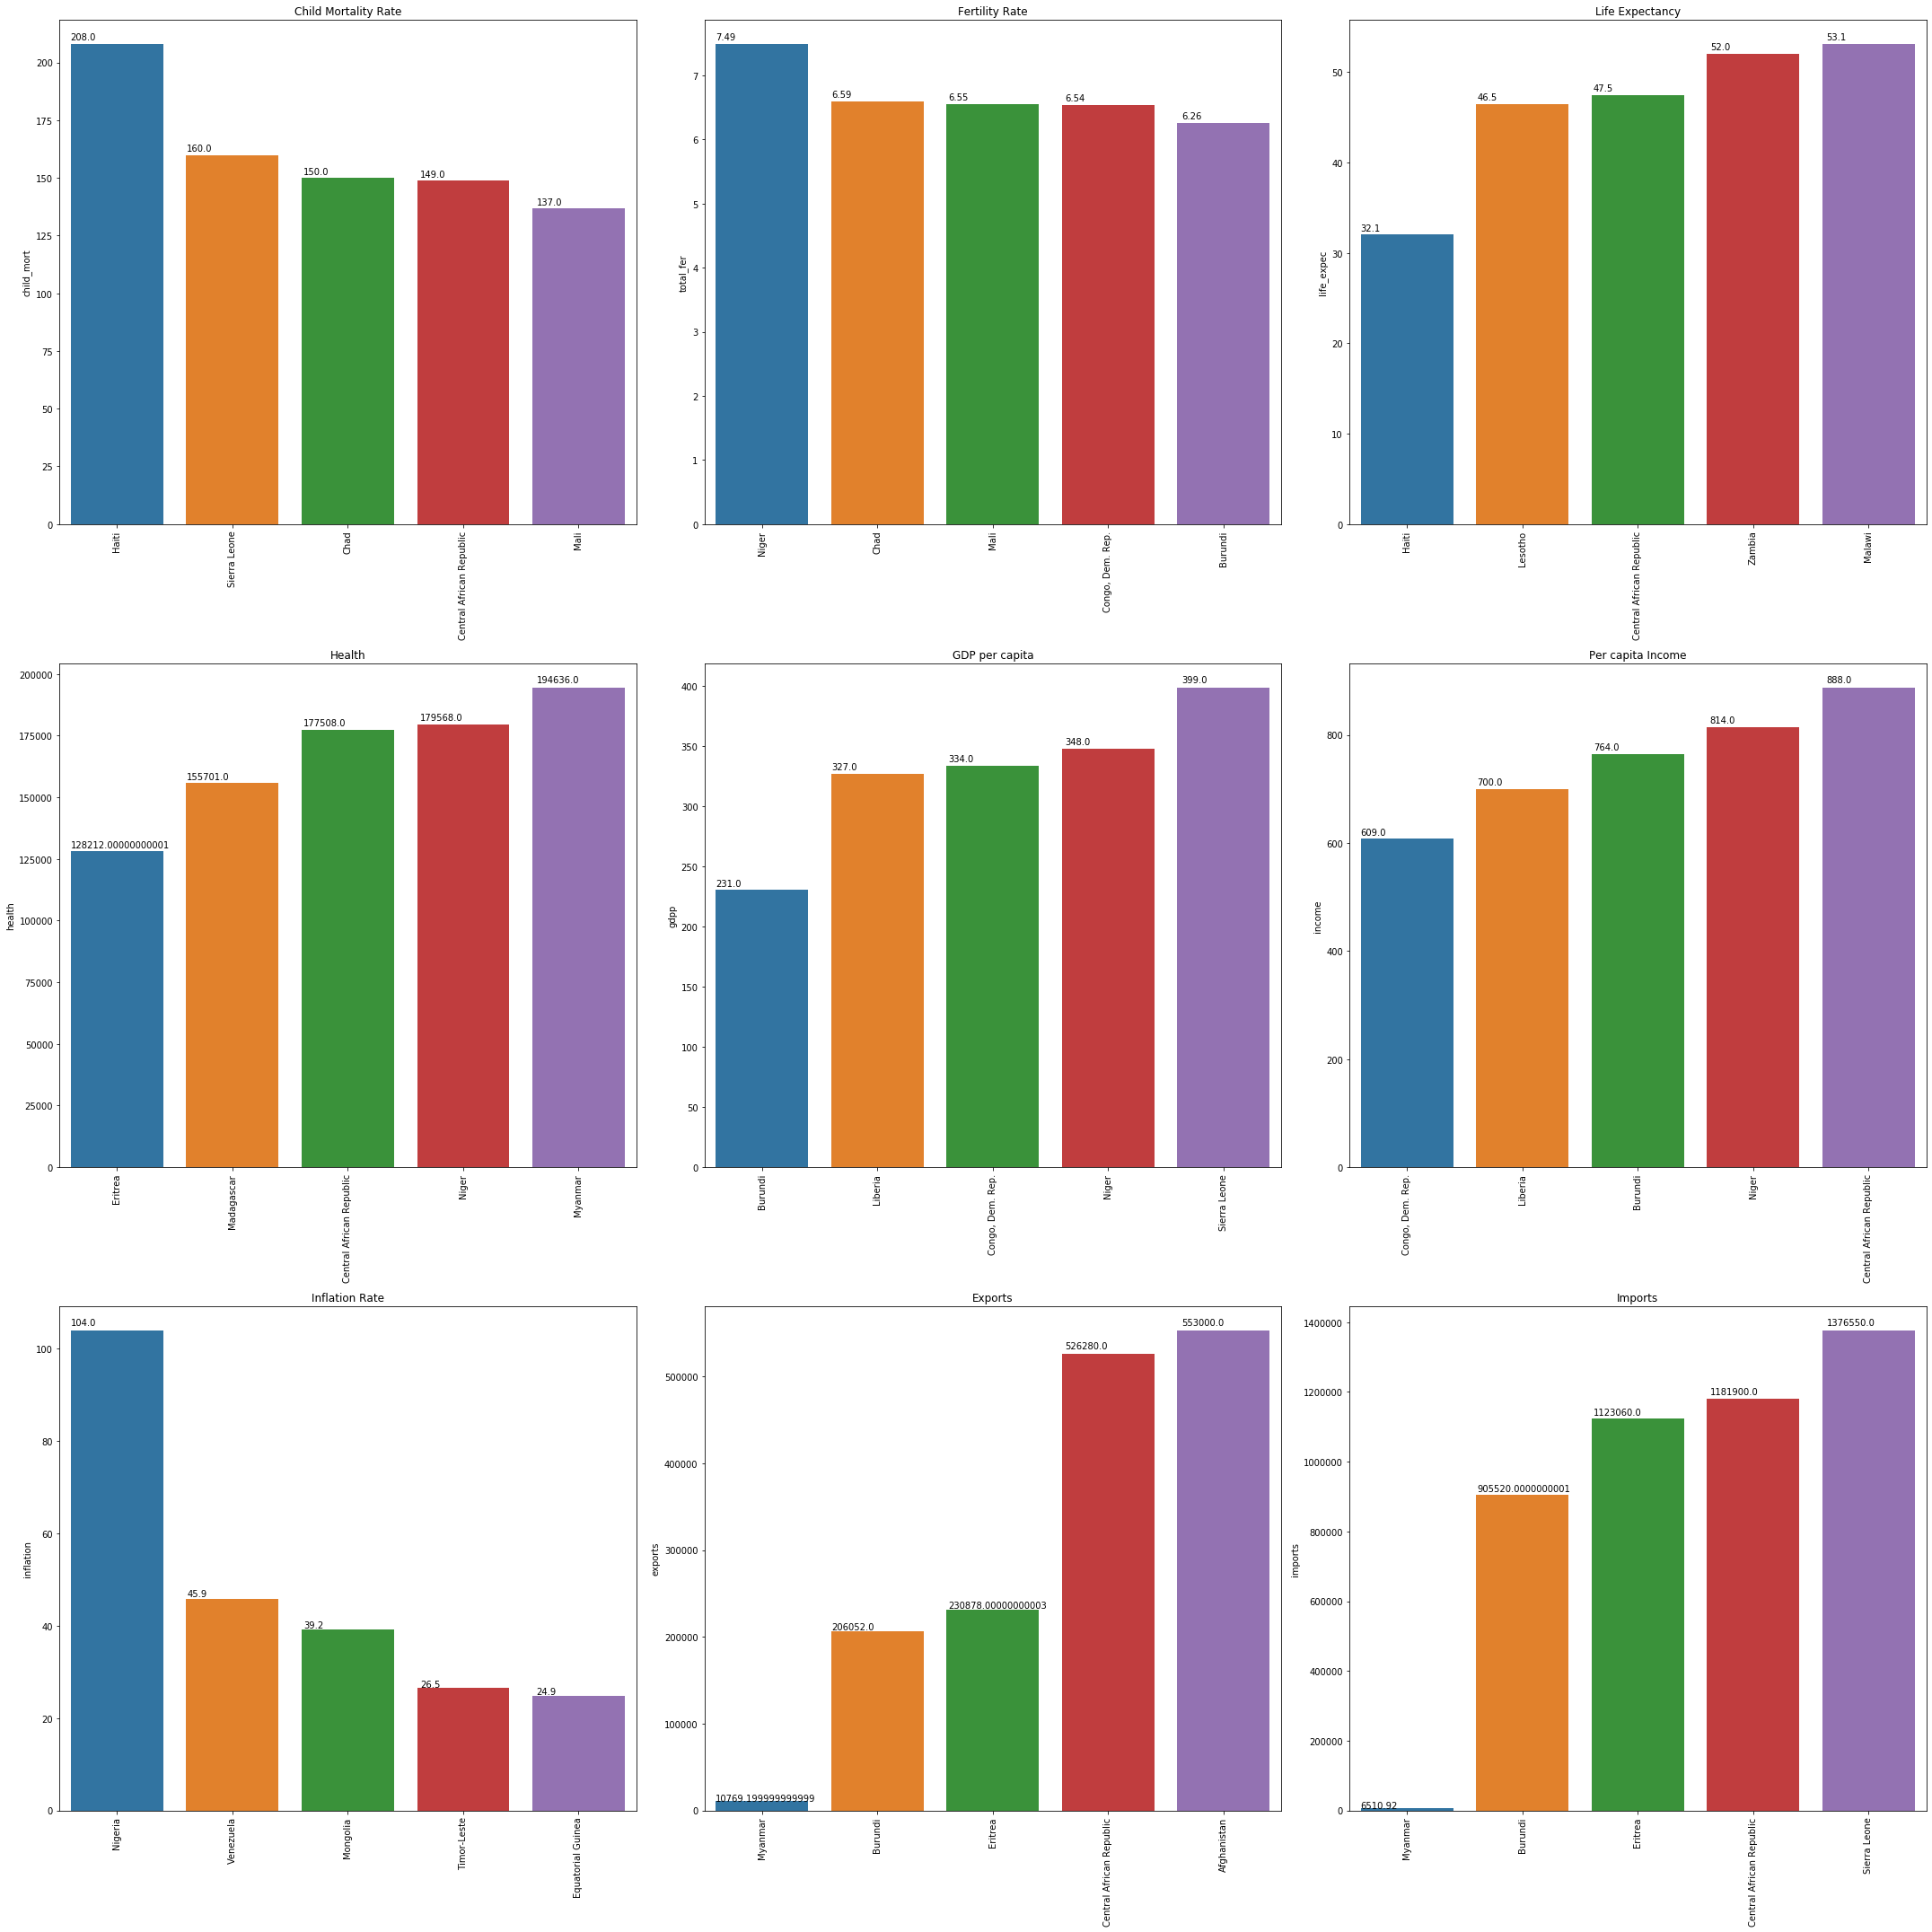

In [14]:
fig, axs = plt.subplots(3,3,figsize = (30,30))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
Child_mort = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(5)
ax = sns.barplot(x='country', y='child_mort', data= Child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
Total_fer = df[['country','total_fer']].sort_values('total_fer', ascending = False).head(5)
ax = sns.barplot(x='country', y='total_fer', data= Total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
Life_expec = df[['country','life_expec']].sort_values('life_expec', ascending = True).head(5)
ax = sns.barplot(x='country', y='life_expec', data= Life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Life Expectancy')

# Health :Total health spending.
Health = df[['country','health']].sort_values('health', ascending = True).head(5)
ax = sns.barplot(x='country', y='health', data= Health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.
GDPP = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(5)
ax = sns.barplot(x='country', y='gdpp', data= GDPP, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'GDP per capita')

# Per capita Income : Net income per person
Income = df[['country','income']].sort_values('income', ascending = True).head(5)
ax = sns.barplot(x='country', y='income', data= Income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP
Inf = df[['country','inflation']].sort_values('inflation', ascending = False).head(5)
ax = sns.barplot(x='country', y='inflation', data= Inf, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Inflation Rate')


# Exports: Exports of goods and services.
Exports = df[['country','exports']].sort_values('exports', ascending = True).head(5)
ax = sns.barplot(x='country', y='exports', data= Exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Exports')


# Imports: Imports of goods and services.
Imports = df[['country','imports']].sort_values('imports', ascending = True).head(5)
ax = sns.barplot(x='country', y='imports', data= Imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', title= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()    
plt.show()

### Inferences
 - The above plots shows the five countries which are in need of aid individually for all the factors taken in consideration
 - These plots will help us in further analysis when we'll cluster the countries and find top 5

## Visualising the varibles through univariate analysis via distplot

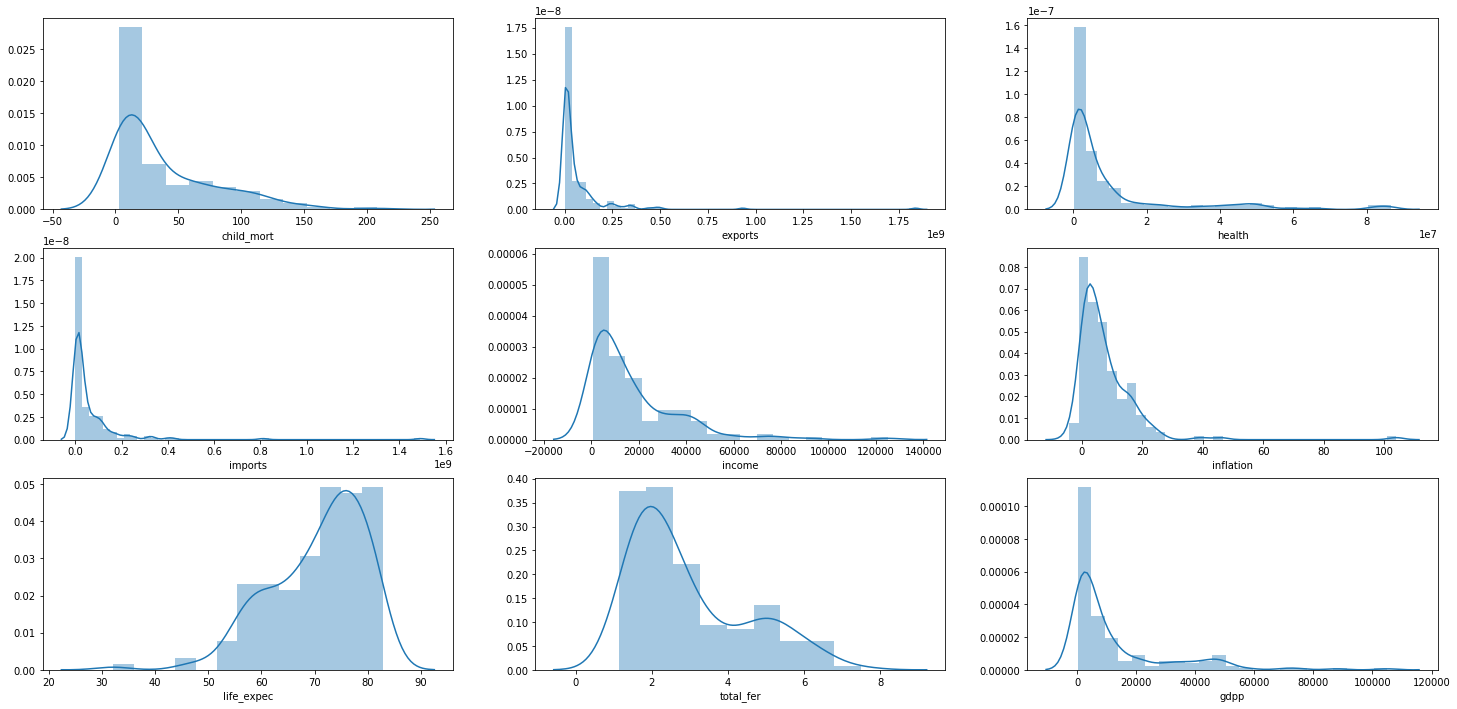

In [15]:
plt.figure(figsize = (25,12))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

### Inferences
 - life_expec is right-skewed whereas all the rest features are left-skewed.
 - total_fer and gdpp are bimodal whereas all the rest features are unimodal.

# Outlier Treatment

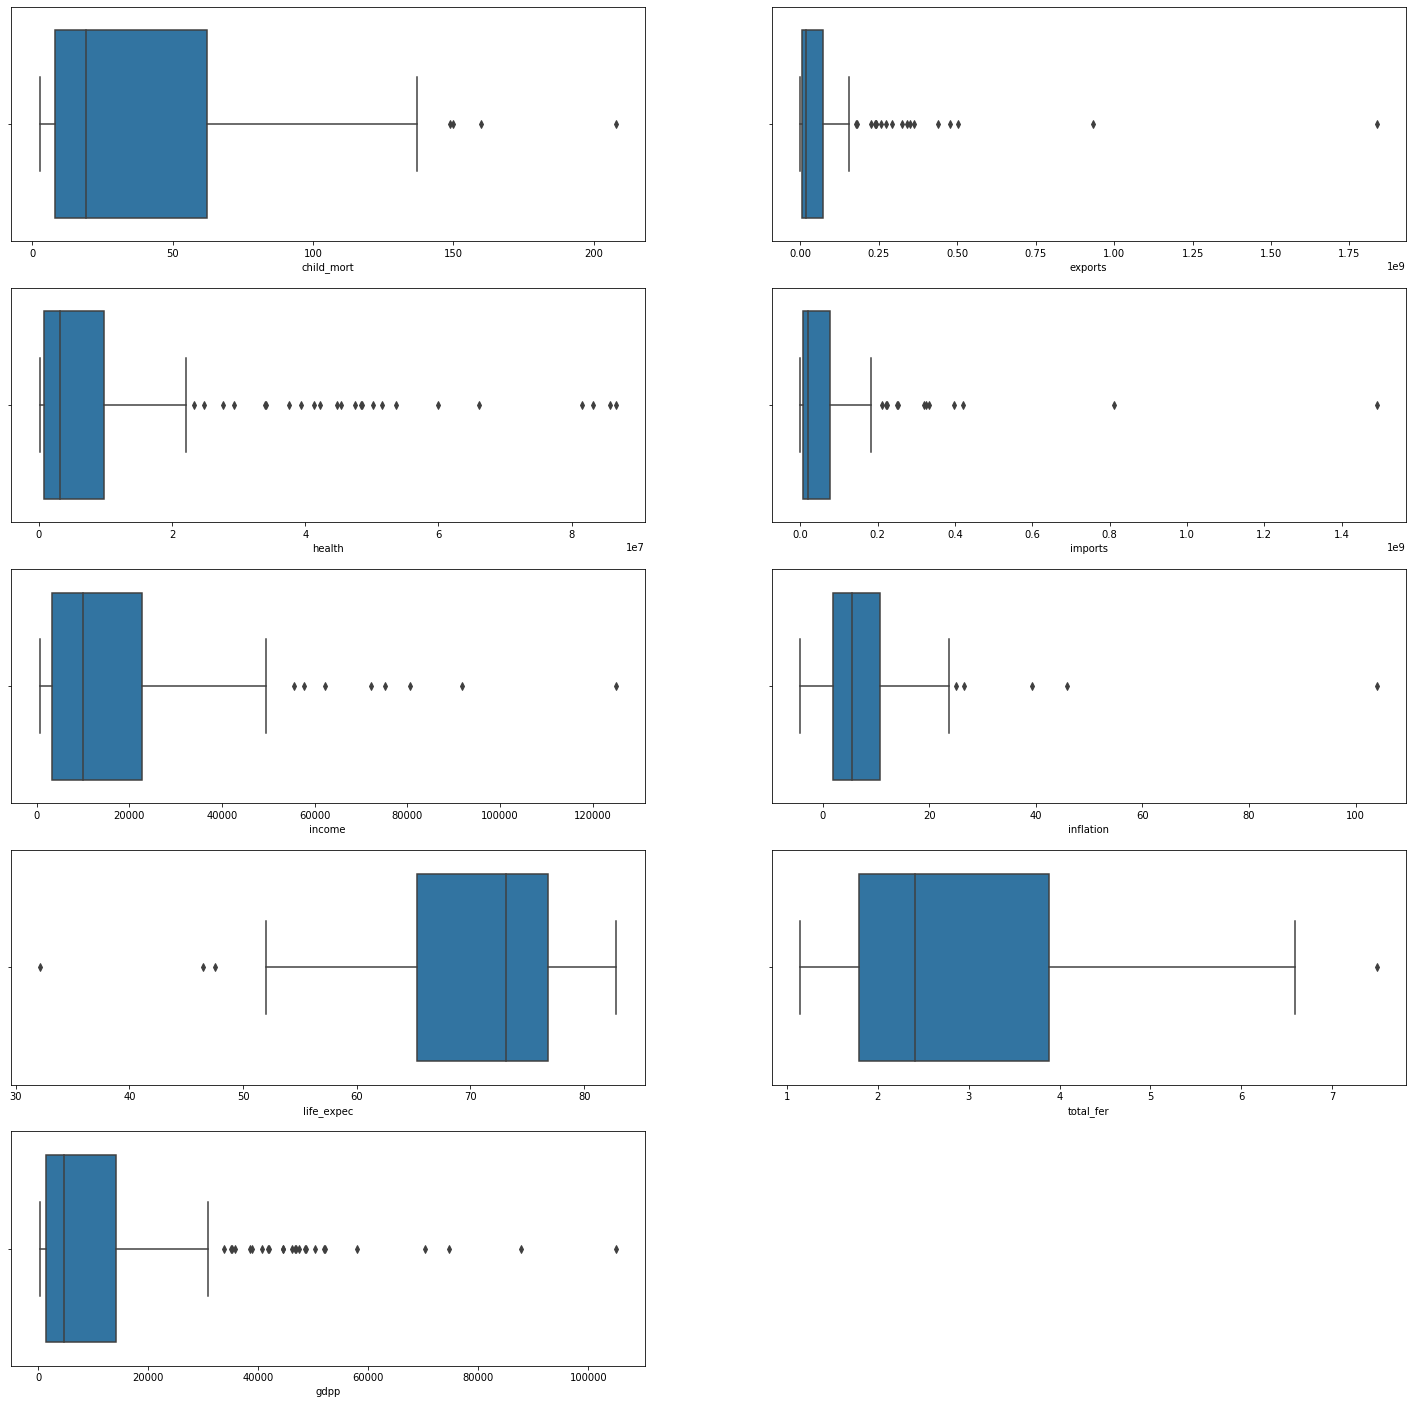

In [16]:
plt.figure(figsize = (25,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(df[i[1]])

### Outlier Analysis

 - There is atleast one outlier in all the features
 - In case of gdpp and health, there are too many outliers.
 - As per the data given, all the outliers couldn't be capped as we don't want the countries that needs aid to be treated with a single value.
 - As per business need, The Features are capped as mentioned below:
1. Soft-Range capping of upper end outiers is done for mentioned features  : 'exports', 'health', 'imports', 'income','inflation','total_fer', 'gdpp'.
2. There are lower end outliers for feature 'life_expec' but capping is not done as those countries would be in need of aid.
3. There are upper end outliers for feature 'child_mort' but capping is not done as those countries would be in need of aid.
   

In [17]:
# Capping of outliers
features = ['exports', 'health', 'imports', 'income','inflation', 'total_fer', 'gdpp']
for i in features:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    df[i][df[i]>=q4]=q4

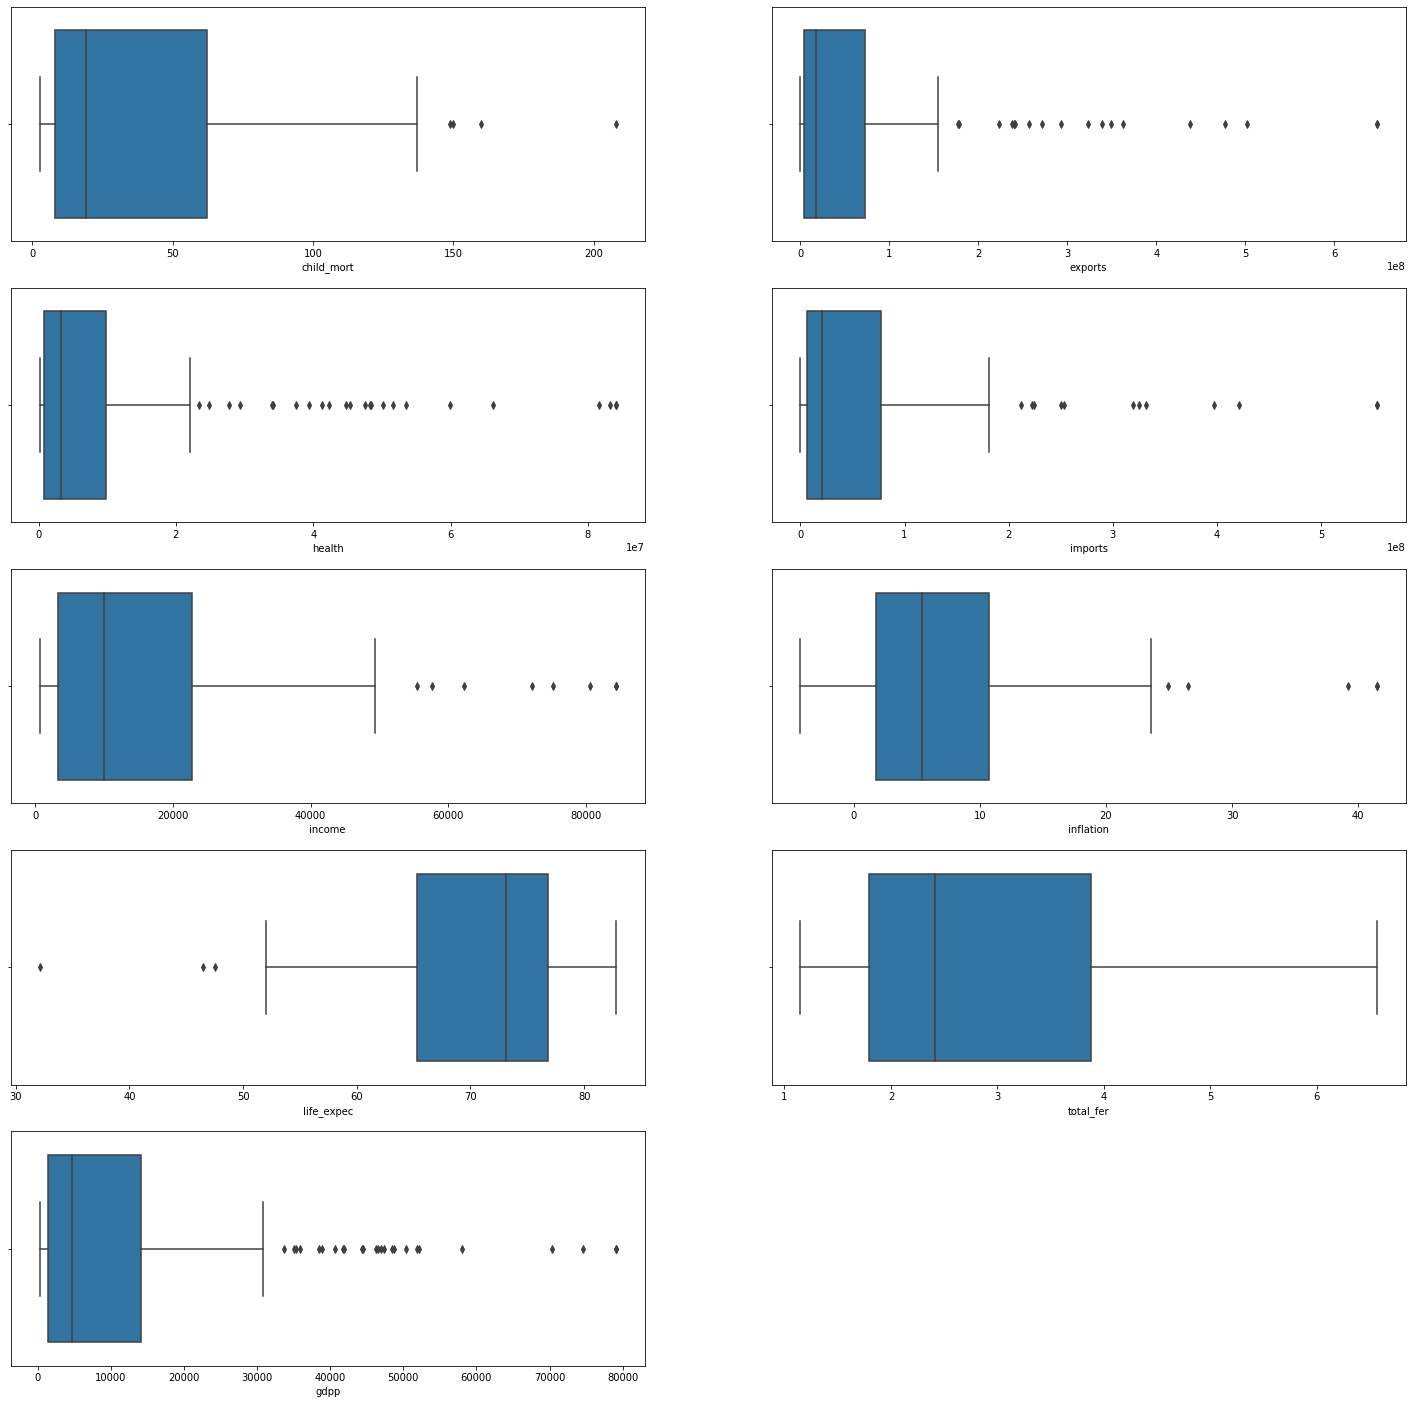

In [18]:
plt.figure(figsize = (25,25))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(df[i[1]])

After the outlier treatment, we now have values that look like outliers in the above plot, this is an artifact of the earlier transformation. These values are within the "normal" expected range of values for the data.

As per the business requirement, not capping the outliers further.

# Hopkins Check


The process to evaluate the data and check if the data is feasible for clustering or not, is known as clustering tendency.

To check clustering tendency, we calculate the hopkins statistics. It determines whether the data points differs significantly from uniformly distributed data in multidimensional space.

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(df.drop('country' , axis=1))

0.9524462675210305

A Higher hopkins score indicates that clustering can be peformed on the dataset.  

## Scaling

Standard-Scaler scales the features around the centre with mean 0 and with a standard deviation of 1.

In [21]:
df_scale = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(167, 9)

In [22]:
df_scale = pd.DataFrame(df_scale)
df_scale.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-0.57,-0.57,-0.60,-0.85,0.27,-1.62,1.93,-0.70
1,-0.54,-0.47,-0.44,-0.41,-0.39,-0.37,0.65,-0.87,-0.50
2,-0.27,-0.42,-0.49,-0.48,-0.22,1.12,0.67,-0.03,-0.48
3,2.01,-0.38,-0.53,-0.46,-0.61,1.93,-1.18,2.15,-0.53
4,-0.70,-0.09,-0.18,0.14,0.13,-0.76,0.70,-0.54,-0.03


Dataframe "df_scale" is ready for clustering

# Clustering

## K-Means Clustering

### Elbow methord for determing K

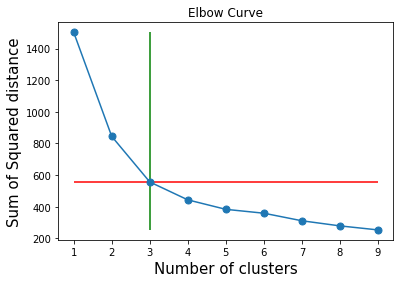

In [23]:
# elbow-curve/SSD
ssd = []
n_cluster = list(range(1,10))
for num_clusters in n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scale)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(n_cluster,ssd,marker='o',markersize=7)
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="g", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="-")
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.title("Elbow Curve")
plt.show()

### Silhouette Score for determing K

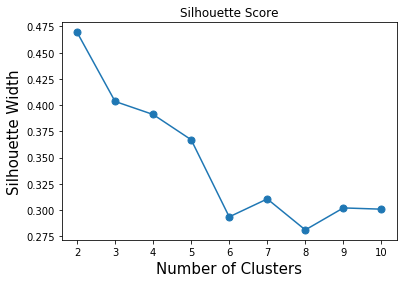

In [24]:
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df_scale)
    ss.append([k, silhouette_score(df_scale, kmeans.labels_)])

plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1],marker='o',markersize=7)
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Silhouette Width',fontsize=15)
plt.title("Silhouette Score")
plt.show()

##### Based on Elbow curve and Silhouette Analysis Curve, we decide to make a trade-off and choose the optimum value of K as 3

## Running K-means with K = 3

In [25]:
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 14)
kmeans.fit(df_scale)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=14, tol=0.0001, verbose=0)

In [26]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [27]:
# Entering the Cluster in the column 'cluster_K' for further analysis

cluster_K = pd.DataFrame(kmeans.labels_, columns = ['cluster_K'])

In [28]:
# Saving the new dataframe for further analysis

df_cluster = df.copy()

In [29]:
# Combing the cluster with cluster labels extracted from K-means

df_cluster = pd.concat([df_cluster, cluster_K ], axis =1)

In [30]:
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K
0,Afghanistan,90.20,553000.00,419174.00,2482970.00,1610.00,9.44,56.20,5.82,553.00,2
1,Albania,16.60,11452000.00,2678950.00,19877400.00,9930.00,4.49,76.30,1.65,4090.00,0
2,Algeria,27.30,17126400.00,1859820.00,14004400.00,12900.00,16.10,76.50,2.89,4460.00,0
3,Angola,119.00,21991900.00,1006050.00,15143700.00,5900.00,22.40,60.10,6.16,3530.00,2
4,Antigua and Barbuda,10.30,55510000.00,7356600.00,71858000.00,19100.00,1.44,76.80,2.13,12200.00,0


In [31]:
# To check How many datapoints we have in each cluster
df_cluster.cluster_K.value_counts().reset_index()

,index,cluster_K
0,0,90
1,2,48
2,1,29


### Visualising the clusters 

Analysing the clusters by comparing how 'gdpp', 'child_mort' and 'income' vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

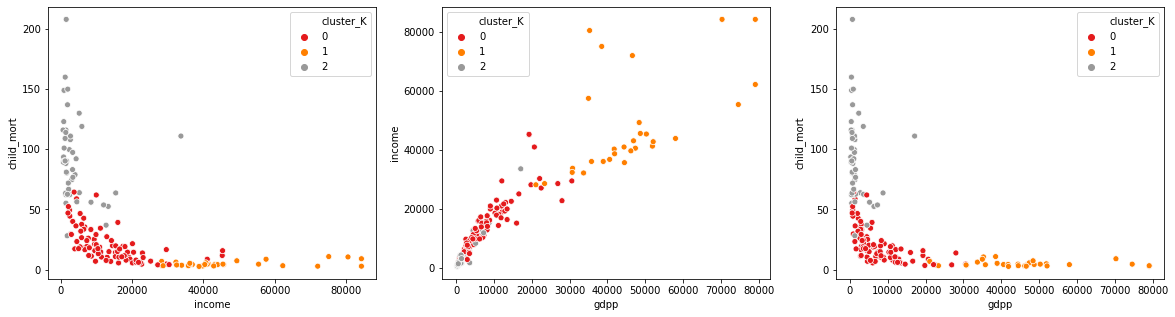

In [32]:
# Scatter-plot:

f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='income', y='child_mort', hue='cluster_K', data=df_cluster, palette='Set1',ax=axes[0]);
sns.scatterplot(x='gdpp', y='income', hue='cluster_K', data=df_cluster, palette='Set1',ax=axes[1]);

sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_K', data=df_cluster, palette='Set1',ax=axes[2]);

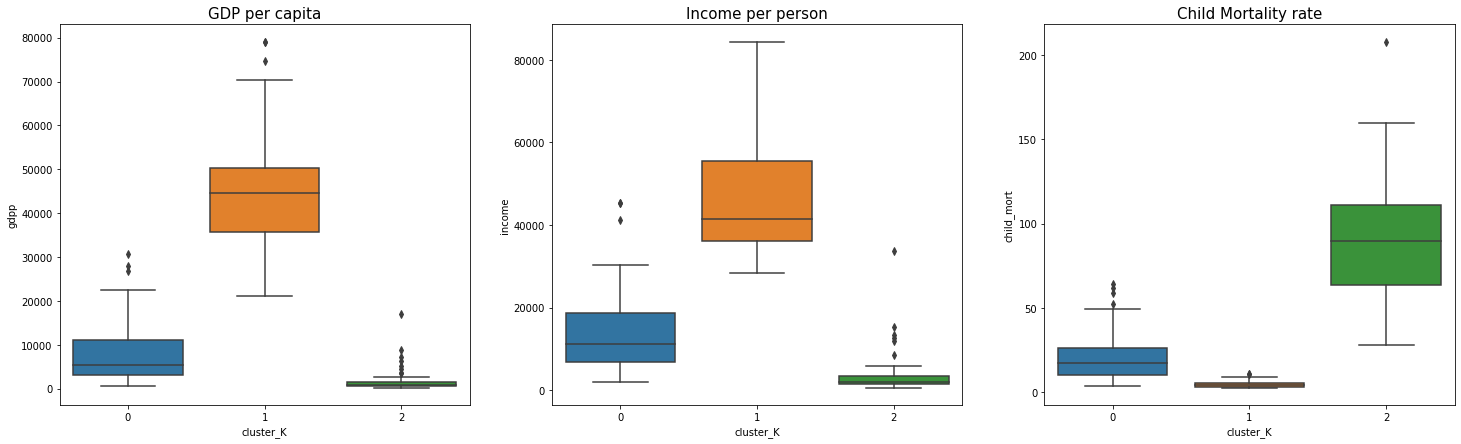

In [33]:
# Box-plot:

f, axes = plt.subplots(1, 3, figsize=(25,7))
sns.boxplot(x='cluster_K',y='gdpp',data=df_cluster,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='cluster_K',y='income',data=df_cluster,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)
sns.boxplot(x='cluster_K',y='child_mort',data=df_cluster,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)
plt.show()

#### Inferences
 - Countries with low gdpp,income and high child mortality are Under-developed countries (cluster_K = 2)
 - Countries with high gdpp,income and low child mortality are Developed countries (cluster_K = 1)
 - Countries with low gdpp,income and low child mortality are Developing countries (cluster_K = 0)


## Cluster Profiling

Cluster profiling is based on major three factors:
 1. Child Mortality
 2. Income
 3. GDPP

Creating a new dataframe for these variable along with the cluster ID

In [34]:
df_clusterK = df_cluster[['child_mort','income','gdpp','cluster_K']]
df_clusterK = df_clusterK.groupby('cluster_K').mean()
df_clusterK

,child_mort,income,gdpp
cluster_K,,,
0,20.55,13804.33,7808.58
1,4.98,47784.41,46068.14
2,91.61,3897.35,1909.21


## Visualising the profiled variables of the dataset via barplot 

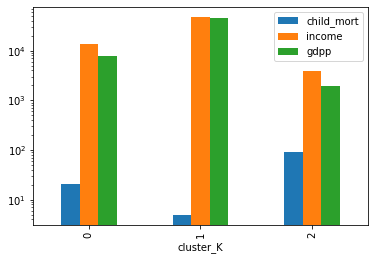

In [35]:
df_clusterK.plot(kind='bar',logy=True);

#### Inferences:
 - Based on above plot, we know that countries with cluster ID 2 are Under-Developed and requires aid
 - Our main focus would be on the countries extracte below and top 5 countries in need of aid are reported to the company

In [36]:
df_cluster[df_cluster['cluster_K'] ==2]['country'].reset_index(drop=True)

0                  Afghanistan
1                       Angola
2                        Benin
3                     Botswana
4                 Burkina Faso
5                      Burundi
6                     Cameroon
7     Central African Republic
8                         Chad
9                      Comoros
10            Congo, Dem. Rep.
11                 Congo, Rep.
12               Cote d'Ivoire
13           Equatorial Guinea
14                     Eritrea
15                       Gabon
16                      Gambia
17                       Ghana
18                      Guinea
19               Guinea-Bissau
20                       Haiti
21                        Iraq
22                       Kenya
23                    Kiribati
24                         Lao
25                     Lesotho
26                     Liberia
27                  Madagascar
28                      Malawi
29                        Mali
30                  Mauritania
31                  Mozambique
32      

### Extracting top 5 countries which have low income, gdpp and high child mortality

In [37]:
top5_Kmeans = df_cluster[df_cluster['cluster_K'] ==2].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head(5)
top5_Kmeans.reset_index(drop=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K
0,"Congo, Dem. Rep.",116.00,1372740.00,264194.00,1656640.00,609.00,20.80,57.50,6.54,334.00,2
1,Liberia,89.30,624570.00,385860.00,3028020.00,700.00,5.47,60.80,5.02,327.00,2
2,Burundi,93.60,206052.00,267960.00,905520.00,764.00,12.30,57.70,6.26,231.00,2
3,Niger,123.00,772560.00,179568.00,1708680.00,814.00,2.55,58.80,6.56,348.00,2
4,Central African Republic,149.00,526280.00,177508.00,1181900.00,888.00,2.01,47.50,5.21,446.00,2


 ###### Above results are based on K-means clustering. We'll be further performing heirachical clustering on our dataframe to compare the results and conclude our analysis

## Heirarchichal Clustering

In [38]:
# Taking the already scaled dataset

df_scale.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.29,-0.57,-0.57,-0.60,-0.85,0.27,-1.62,1.93,-0.70
1,-0.54,-0.47,-0.44,-0.41,-0.39,-0.37,0.65,-0.87,-0.50
2,-0.27,-0.42,-0.49,-0.48,-0.22,1.12,0.67,-0.03,-0.48
3,2.01,-0.38,-0.53,-0.46,-0.61,1.93,-1.18,2.15,-0.53
4,-0.70,-0.09,-0.18,0.14,0.13,-0.76,0.70,-0.54,-0.03


In [39]:
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K
0,Afghanistan,90.20,553000.00,419174.00,2482970.00,1610.00,9.44,56.20,5.82,553.00,2
1,Albania,16.60,11452000.00,2678950.00,19877400.00,9930.00,4.49,76.30,1.65,4090.00,0
2,Algeria,27.30,17126400.00,1859820.00,14004400.00,12900.00,16.10,76.50,2.89,4460.00,0
3,Angola,119.00,21991900.00,1006050.00,15143700.00,5900.00,22.40,60.10,6.16,3530.00,2
4,Antigua and Barbuda,10.30,55510000.00,7356600.00,71858000.00,19100.00,1.44,76.80,2.13,12200.00,0


### Performing Single Linkage

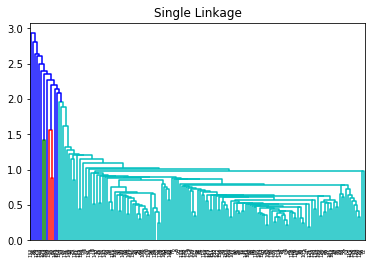

In [40]:
# single linkage
mergings = linkage(df_scale, method="single", metric='euclidean')
dendrogram(mergings)
plt.title("Single Linkage")
plt.show()

### Performing Complete Linkage

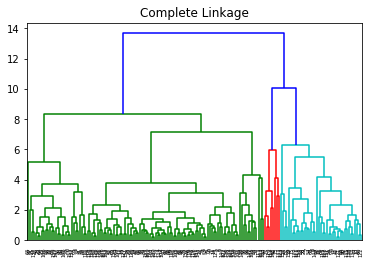

In [41]:
# complete linkage
mergings = linkage(df_scale, method="complete", metric='euclidean')
dendrogram(mergings)
plt.title("Complete Linkage")
plt.show()

#### Inferences:
 - The dendogram produced by single linkage is not well structured
 - The dendogram produced by complete linkage is having proper tree-like structure
 
### Based on above complete linkage, Creating the hierarchichal clustering model by taking n = 3

In [42]:
# 3 clusters
cluster_H = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_H

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [43]:
# assign cluster labels
df_cluster['cluster_H'] = cluster_H
df_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K,cluster_H
0,Afghanistan,90.20,553000.00,419174.00,2482970.00,1610.00,9.44,56.20,5.82,553.00,2,0
1,Albania,16.60,11452000.00,2678950.00,19877400.00,9930.00,4.49,76.30,1.65,4090.00,0,0
2,Algeria,27.30,17126400.00,1859820.00,14004400.00,12900.00,16.10,76.50,2.89,4460.00,0,0
3,Angola,119.00,21991900.00,1006050.00,15143700.00,5900.00,22.40,60.10,6.16,3530.00,2,0
4,Antigua and Barbuda,10.30,55510000.00,7356600.00,71858000.00,19100.00,1.44,76.80,2.13,12200.00,0,1


In [44]:
df_cluster.cluster_H.value_counts().reset_index()

,index,cluster_H
0,0,118
1,1,41
2,2,8


### Visualising the clusters 

Analysing the clusters by comparing how 'gdpp', 'child_mort' and 'income' vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.

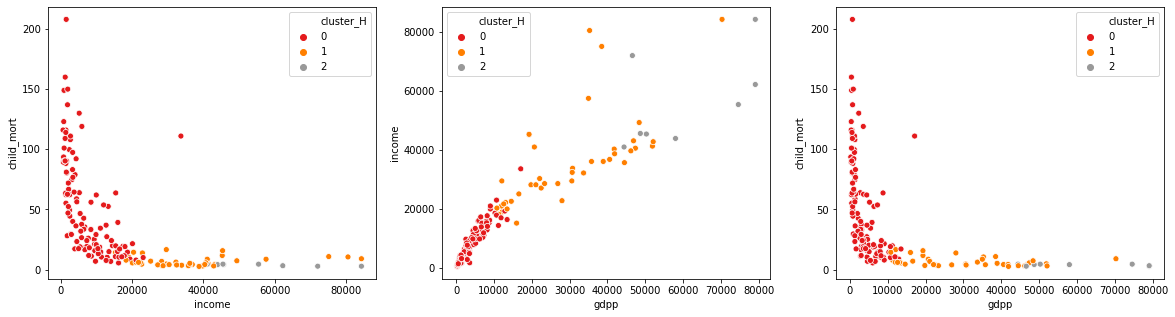

In [45]:
# Scatter-Plot : 

f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.scatterplot(x='income', y='child_mort', hue='cluster_H', data=df_cluster, palette='Set1',ax=axes[0]);
sns.scatterplot(x='gdpp', y='income', hue='cluster_H', data=df_cluster, palette='Set1',ax=axes[1]);
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_H', data=df_cluster, palette='Set1',ax=axes[2]);

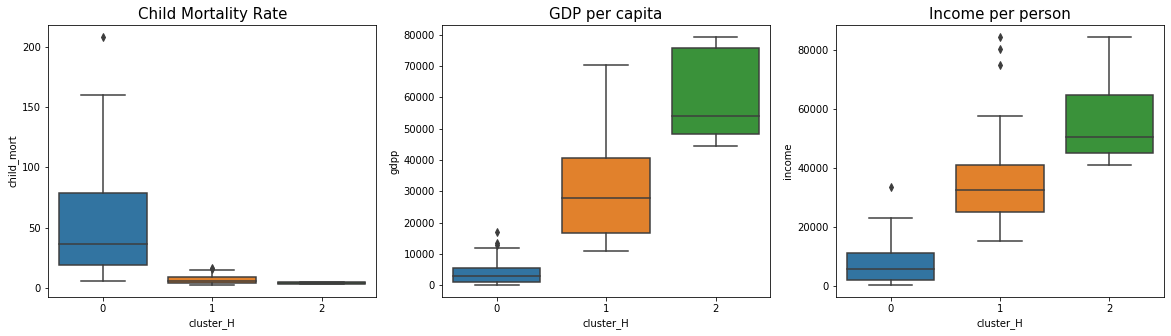

In [46]:
# Boxplot :
f, axes = plt.subplots(1, 3, figsize=(20,5))
sns.boxplot(x='cluster_H', y='child_mort', data=df_cluster,ax=axes[0]);
axes[0].set_title('Child Mortality Rate',fontsize=15)
sns.boxplot(x='cluster_H', y='gdpp', data=df_cluster,ax=axes[1]);
axes[1].set_title('GDP per capita',fontsize=15)
sns.boxplot(x='cluster_H', y='income', data=df_cluster,ax=axes[2]);
axes[2].set_title('Income per person',fontsize=15)
plt.show()

#### Inferences
 - Since the size of the cluster varies significantly, we can't categorize the countries based on the level of developement

## Cluster Profiling

Cluster profiling is based on major three factors:
 1. Child Mortality
 2. Income
 3. GDPP

Creating a new dataframe for these variable along with the cluster ID

In [47]:
df_clusterH = df_cluster[['child_mort','income','gdpp','cluster_H']]
df_clusterH = df_clusterH.groupby('cluster_H').mean()
df_clusterH

,child_mort,income,gdpp
cluster_H,,,
0,51.51,7581.89,3732.32
1,6.88,35853.02,29492.68
2,3.83,56321.75,60097.00


### Visualising the profiled variables of the dataset via barplot 

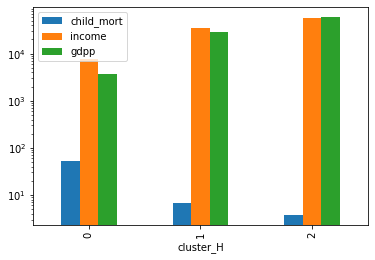

In [48]:
df_clusterH.plot(kind = 'bar',logy=True);

#### Inferences:
 - Based on above plot, we know that countries with cluster ID 0 are Under-Developed and requires aid
 - Our main focus would be on the countries extracte below and top 5 countries in need of aid are reported to the company

In [49]:
df_cluster[df_cluster['cluster_H'] ==0]['country'].reset_index(drop=True)

0                         Afghanistan
1                             Albania
2                             Algeria
3                              Angola
4                           Argentina
5                             Armenia
6                          Azerbaijan
7                          Bangladesh
8                             Belarus
9                              Belize
10                              Benin
11                             Bhutan
12                            Bolivia
13             Bosnia and Herzegovina
14                           Botswana
15                             Brazil
16                           Bulgaria
17                       Burkina Faso
18                            Burundi
19                           Cambodia
20                           Cameroon
21                         Cape Verde
22           Central African Republic
23                               Chad
24                              Chile
25                              China
26          

### Extracting the top 5 countries which have low income, gdpp and high child mortality

In [50]:
top5_Hier = df_cluster[df_cluster['cluster_H'] ==0].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head(5)
top5_Hier.reset_index(drop=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_K,cluster_H
0,"Congo, Dem. Rep.",116.00,1372740.00,264194.00,1656640.00,609.00,20.80,57.50,6.54,334.00,2,0
1,Liberia,89.30,624570.00,385860.00,3028020.00,700.00,5.47,60.80,5.02,327.00,2,0
2,Burundi,93.60,206052.00,267960.00,905520.00,764.00,12.30,57.70,6.26,231.00,2,0
3,Niger,123.00,772560.00,179568.00,1708680.00,814.00,2.55,58.80,6.56,348.00,2,0
4,Central African Republic,149.00,526280.00,177508.00,1181900.00,888.00,2.01,47.50,5.21,446.00,2,0


# Conclusion

#### I Choose K-Means Clustering Algorithm over Hierarchical Clustering Algorithm:

 - The cluster_K value counts were properly divided and visualizing each cluster was possible.

 - In both the methods, 3 clusters were formed but K-means gave significant plots.

 - After grouping all the countries into 3 groups by using some socio-economic and health factors, we can determine the overall development of the countries.

 - Here, the countries are categorised into list of developed countries, developing countries and under-developed countries.

 - In Developed countries, we can see the GDP per capita and income is high where as Death of children under 5 years of age per 1000 live births i.e. child-mort is very low, which is expected.

 - In Developing countries and Under-developed countries, the GDP per capita and income are low and child-mort is high. Specially, for under-developed countries, the death rate of children is very high.

# Recommendations:

## The top countries that are in need of aid are presented below:

In [51]:
for countries in top5_Kmeans.country:
    print(countries)

Congo, Dem. Rep.
Liberia
Burundi
Niger
Central African Republic


### The primary focus for the funding should be on countires of this segment.

+ The major approach should be to provide better health facilities as this would increase the life expectancy and decrese the child mortality.
 
+ Other focus should be on increasing the exports as that would give an increase in income and thus, GDPP will increase.

+ The difference between the average of socio-economic factors of developed countries as compared to under-developed countries is quite huge.This funding would definitely help in improved conditions for above mentioned countries even though it might not show a significant impact